In [1]:
from IPython.core.display import clear_output
import friendlysam as fs
import pandas as pd
import model_factory
import seaborn as sns
import matplotlib.pyplot as plt
import dill
parameters = model_factory.get_parameters(
    time_unit=pd.Timedelta('6h'),
    step=pd.Timedelta('24h'))
%matplotlib inline

In [2]:
seed = 2
t0 = pd.Timestamp('2013-01-01')
t_end = pd.Timestamp('2014-01-01')
m = model_factory.make_model(parameters, seed=seed)
m.time = t0
m.solver = fs.get_solver()
while m.time <= t_end:
    clear_output(wait=True)
    print('Simulating...', m.time)
    m.advance()
print('Done!')

# Save model with dill pickle:
# dill.dump(m, open(filename, 'wb'))

# And open it again like this:
# m = dill.load(open(filename, 'rb'))

Simulating... 2014-01-01 00:00:00
Done!


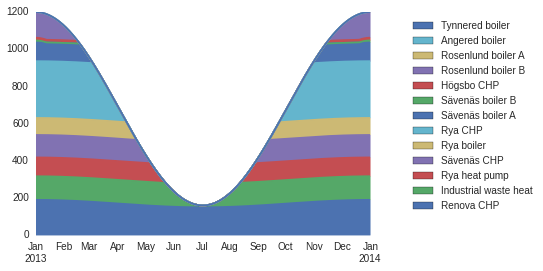

In [3]:
from model_factory import Resources

def is_producer(part, resource):
    return resource in part.production

heat_producers = [p for p in m.descendants if is_producer(p, Resources.heat) and not isinstance(p, fs.Cluster)]

times = m.times_between(t0, t_end)

heat = {p.name: fs.get_series(p.production[Resources.heat], times) for p in heat_producers}
heat = pd.DataFrame.from_dict(heat)
order = ['Renova CHP',
'Industrial waste heat',
'Rya heat pump',
'Sävenäs CHP',
'Rya boiler',
'Rya CHP',
'Sävenäs boiler A',
'Sävenäs boiler B',
'Högsbo CHP',
'Rosenlund boiler B',
'Rosenlund boiler A',
'Angered boiler',
'Tynnered boiler',
]
heat = heat[order]

heat *= pd.Timedelta('1h') / heat.index.freq

p = heat.plot(kind='area', legend='reverse')
p.get_legend().set_bbox_to_anchor((1.1, 1))

In [4]:
print(heat.sum())

Renova CHP               248389.999953
Industrial waste heat    160381.607045
Rya heat pump            108282.584187
Sävenäs CHP              114180.688972
Rya boiler                76650.668066
Rya CHP                  199196.292385
Sävenäs boiler A          45130.566740
Sävenäs boiler B            706.851485
Högsbo CHP                 5482.403065
Rosenlund boiler B        35598.336845
Rosenlund boiler A            0.000000
Angered boiler                0.000000
Tynnered boiler               0.000000
dtype: float64
